 # Strong Form
 
 $\nabla \cdot\biggl(s^2\left(\langle p\rangle_+\boldsymbol{I} + \mathbb{I}_{dev}\mathbb{C} \boldsymbol{\epsilon}\right) + \langle p\rangle_- \boldsymbol{I}\biggr) = {\bf{0}}$
 
 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - s\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon}\biggr)+\frac{G_c}{l}\left(1-s\right) = 0$


### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$


 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})+\frac{G_c}{l}\left(1-s\right) = 0$

where 

$\boldsymbol{\sigma} = \mathbb{C}_{mod} \boldsymbol{\epsilon}$

$\mathcal{E} = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon}\biggr)$


$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$


 # Weak Form

### For elasticity part
 
 $ a(\boldsymbol{u},\boldsymbol{v}) = \int_{\Omega} \epsilon(\boldsymbol{v}):\sigma(\boldsymbol{u}) d{\Omega}$

 $ l(\boldsymbol{v}) = 0$

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +   \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using PyPlot

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [2]:
I2 = one(TensorValue{2,2,Float64})
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/3)*I4_sym
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2,Float64,9}(0.6666666666666667, 0.0, 0.0, 0.0, 0.33333333333333337, 0.0, 0.0, 0.0, 0.6666666666666667)

In [3]:
const L = 20.0
const LL = 0.475.*L
const LR = 0.525.*L

const H = 8.0
const CH = 1.5 #Crack height
const CW = L/2000 #Crack Width
const e₁ = 4.75
const CP = L/2 - e₁
const SD = 1.0
const HP = 6.0
const HR = 0.25
const HH1 = 2.75
const HH2 = 4.75
const HH3 = 6.75
const lsp = 0.01

const hfc = lsp/50  #Mesh size parameter
const hf = lsp/2.1 #Mesh size parameter
const hfl = 50*hf  #Mesh size parameter
const hfh = hf  #Mesh size parameter

const h = 100*hf #Mesh size parameter

θ = π/180
cr1 = CP+(CW/2) + HP*tan(θ)
cr2 = CP-(CW/2) + HP*tan(θ)

const FMR = 40*lsp

0.4

In [4]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

p1 = gmsh.model.geo.addPoint(CP+(CW/2), 0.0 , 0.0, h)
p2 = gmsh.model.geo.addPoint(L-SD, 0.0, 0.0, h)
p3 = gmsh.model.geo.addPoint(L, 0.0, 0.0, h)
p4 = gmsh.model.geo.addPoint(L, H, 0.0, h)
p5 = gmsh.model.geo.addPoint(LR, H, 0.0, hfl)
p6 = gmsh.model.geo.addPoint(LL, H, 0.0, hfl)
p7 = gmsh.model.geo.addPoint(0.0, H, 0.0, h)
p8 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p9 = gmsh.model.geo.addPoint(SD, 0.0, 0.0, h)
p10 = gmsh.model.geo.addPoint(CP-(CW/2), 0.0, 0.0, h)
p11 = gmsh.model.geo.addPoint(CP-(CW/2), CH, 0.0, hfc) 
p12 = gmsh.model.geo.addPoint(CP+(CW/2), CH, 0.0, hfc)  

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10) 
l10 = gmsh.model.geo.addLine(p10, p11) 
l11 = gmsh.model.geo.addLine(p11, p12) 
l12 = gmsh.model.geo.addLine(p12, p1) 
cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12]) 


p13 = gmsh.model.geo.addPoint(HP-HR, HH1, 0.0, hfh)
p14 = gmsh.model.geo.addPoint(HP+HR, HH1, 0.0, hfh)
p15 = gmsh.model.geo.addPoint(HP, HH1, 0.0, hfh)

ca1 = gmsh.model.geo.addCircleArc(p13, p15, p14)
ca2 = gmsh.model.geo.addCircleArc(p14, p15, p13)
cl2 = gmsh.model.geo.addCurveLoop([ca1,ca2])

p16 = gmsh.model.geo.addPoint(HP-HR, HH2, 0.0, hfh)
p17 = gmsh.model.geo.addPoint(HP+HR, HH2, 0.0, hfh)
p18 = gmsh.model.geo.addPoint(HP, HH2, 0.0, hfh)

ca3 = gmsh.model.geo.addCircleArc(p16, p18, p17)
ca4 = gmsh.model.geo.addCircleArc(p17, p18, p16)
cl3 = gmsh.model.geo.addCurveLoop([ca3,ca4])

p19 = gmsh.model.geo.addPoint(HP-HR, HH3, 0.0, hfh)
p20 = gmsh.model.geo.addPoint(HP+HR, HH3, 0.0, hfh)
p21 = gmsh.model.geo.addPoint(HP, HH3, 0.0, hfh)

ca5 = gmsh.model.geo.addCircleArc(p19, p21, p20)
ca6 = gmsh.model.geo.addCircleArc(p20, p21, p19)
cl4 = gmsh.model.geo.addCurveLoop([ca5,ca6])

ps1 = gmsh.model.geo.addPlaneSurface([cl1,-cl2,-cl3,-cl4])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])

pg2 = gmsh.model.addPhysicalGroup(1, [l5])
pg3 = gmsh.model.addPhysicalGroup(0, [p9])
pg4 = gmsh.model.addPhysicalGroup(0, [p2])

gmsh.model.setPhysicalName(2, pg1, "Domain")


gmsh.model.setPhysicalName(1, pg2, "LoadLine")
gmsh.model.setPhysicalName(0, pg3, "LeftSupport")
gmsh.model.setPhysicalName(0, pg4, "RightSupport")

p22 = gmsh.model.geo.addPoint(CP-(CW/2), 0.8*CH, 0.0, hf) 
p23 = gmsh.model.geo.addPoint(CP+(CW/2), 0.8*CH, 0.0, hf) 

p24 = gmsh.model.geo.addPoint(HP, cr1, 0.0, hf)
p25 = gmsh.model.geo.addPoint(HP, cr2, 0.0, hf)

l13 = gmsh.model.geo.addLine(p22, p24)
l14 = gmsh.model.geo.addLine(p23, p25)


gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "EdgesList", [l13,l14])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", hf)
gmsh.model.mesh.field.setNumber(2, "LcMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", FMR)
gmsh.model.mesh.field.setNumber(2, "DistMax", 1.5*FMR)

l15 = gmsh.model.geo.addLine(p24,p6)
l16 = gmsh.model.geo.addLine(p23, p5)

gmsh.model.mesh.field.add("Distance", 3)
gmsh.model.mesh.field.setNumbers(3, "EdgesList", [l15,l16])

gmsh.model.mesh.field.add("Threshold", 4)
gmsh.model.mesh.field.setNumber(4, "IField", 3)
gmsh.model.mesh.field.setNumber(4, "LcMin", hfl)
gmsh.model.mesh.field.setNumber(4, "LcMax", h)
gmsh.model.mesh.field.setNumber(4, "DistMin", FMR)
gmsh.model.mesh.field.setNumber(4, "DistMax", 1.5*FMR)


gmsh.model.mesh.field.add("Min",5)
gmsh.model.mesh.field.setNumbers(5, "FieldsList",[2,4])
gmsh.model.mesh.field.setAsBackgroundMesh(5)
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("AsymThreePtBending.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Meshing curve 10 (Line)
Info    : Meshing curve 11 (Line)
Info    : Meshing curve 12 (Line)
Info    : Meshing curve 13 (Circle)
Info    : Meshing curve 14 (Circle)
Info    : Meshing curve 15 (Circle)
Info    : Meshing curve 16 (Circle)
Info    : Meshing curve 17 (Circle)
Info    : Meshing curve 18 (Circle)
Info    : Meshing curve 19 (Line)
Info    : Meshing curve 20 (Line)
Info    : Meshing curve 21 (Line)
Info    : Meshing curve 22 (Line)
Info    : Done meshing 1D (0.033519 s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Delaunay)
Info    : Done meshing 2D (6.18822 s)
Info    : 204698 vertices 407288 elements
Info    : Writing 'AsymThreePtBendin

In [5]:
model = GmshDiscreteModel("AsymThreePtBending.msh")
writevtk(model,"AsymThreePtBending")

Info    : Reading 'AsymThreePtBending.msh'...
Info    : 48 entities
Info    : 202564 nodes
Info    : 403724 elements
Info    : Done reading 'AsymThreePtBending.msh'


3-element Array{Array{String,1},1}:
 ["AsymThreePtBending_0.vtu"]
 ["AsymThreePtBending_1.vtu"]
 ["AsymThreePtBending_2.vtu"]

## Input paramters for Phase Field Model

#### Input elasticity parameters

In [6]:
const E_mat = 4.75e5
const ν_mat = 0.35

G₁₂_mat = E_mat/(2*(1+ν_mat))

175925.92592592593

#### Input fracture parameters

In [7]:
const Gc = 1.8
const η = 1e-15

1.0e-15

## Constitutive Tensors

In [8]:
function ElasFourthOrderConstTensor(E₁,E₂,ν₁₂,ν₂₁,G₁₂,PlanarState)
    # 1 for Plane Stress and 2 Plane Strain Condition 
  if PlanarState == 1
      C1111 = E₁/(1-ν₁₂*ν₂₁)
      C1122 = (ν₂₁*E₁)/(1-ν₁₂*ν₂₁)
      C1112 = 0.0
      C2222 = E₂/(1-ν₁₂*ν₂₁)
      C2212 = 0.0
      C1212 = G₁₂     
  elseif PlanarState == 2
      C1111 = (E₁*(1-ν₁₂*ν₂₁))/((1+ν₁₂)*(1-ν₁₂-2*ν₁₂*ν₂₁))
      C1122 = (ν₂₁*E₁)/(1-ν₁₂-2*ν₁₂*ν₂₁)
      C1112 = 0.0
      C2222 = (E₂*(1-ν₁₂))/(1-ν₁₂-2*ν₁₂*ν₂₁)
      C2212 = 0.0
      C1212 = G₁₂ 
  end
  C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end
const C_mat = ElasFourthOrderConstTensor(E_mat,E_mat,ν_mat,ν_mat,G₁₂_mat,2)

SymFourthOrderTensorValue{2,Float64,9}(762345.6790123456, 0.0, 410493.8271604938, 0.0, 175925.92592592593, 0.0, 410493.8271604938, 0.0, 762345.6790123456)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma(\epsilon(\boldsymbol{u}),s) =  \mathbb{C}_{mod}\,\boldsymbol{\epsilon}$

In [9]:
σ_elas(ε) = C_mat ⊙ ε

function σ_mod(ε, ε_in, s_in)  
 if tr(ε_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(ε)
  elseif tr(ε_in) < 0
      σ = (s_in^2 + η) *I4_dev ⊙ σ_elas(ε) + I4_vol⊙ σ_elas(ε)
  end  
    return σ
end

σ_mod (generic function with 1 method)

### Elastic Strain Energy

In [10]:
function ψPos(ε_in)   
 if tr(ε_in) >= 0
      ψPlus = 0.5*(ε_in ⊙ σ_elas(ε_in))
  elseif tr(ε_in) < 0
      ψPlus = 0.5*((I4_dev ⊙ σ_elas(ε_in)) ⊙ (I4_dev ⊙ ε_in)) 
  end  
    return ψPlus
end

ψPos (generic function with 1 method)

In [11]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

## FE formulation

In [12]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [13]:
order = 1
degree = 2*order

2

In [14]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [15]:
labels = get_face_labeling(model)
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 5
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 8708529075778633726

In [16]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 403717
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 5450409863462084834

In [17]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["LeftSupport","RightSupport","LoadLine"],
          dirichlet_masks=[(true,true), (false,true),(false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 403717
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 5450409863462084834

In [18]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [19]:
 function   stepDisp(uh_in,sh_in,vApp)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        uApp3(x) = VectorValue(0.0,-vApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])

        a_Disp(u,v) = ∫( (ε(v) ⊙ (σ_mod∘(ε(u),ε(uh_in),sh_in)) ) )*dΩ
        b_Disp(v) = 0.0
        op_Disp = AffineFEOperator(a_Disp,b_Disp,U_Disp,V0_Disp)
        uh_out = solve(op_Disp)
    return uh_out
end

stepDisp (generic function with 1 method)

In [20]:
cd("ResultsASymThreePtBendingTest")

In [21]:
vApp = 0
delv = 1e-3
const vAppMax = 0.04
innerMax = 10
count = 0

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)

while vApp .< vAppMax 
    count = count .+ 1
    if vApp >= 1e-2
        delv = 5e-4
    elseif vApp >= 2e-2
        delv = 1e-4
    end
    vApp = vApp .+ delv
    print("\n Entering displacemtent step$count :", float(vApp))
    
   for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh + (Gc/lsp)*sh*sh)*dΩ-∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh = stepDisp(uh,sh,vApp)
        
        ψhPos_in = ψPos∘(ε(uh))    
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if  RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_mod∘(ε(uh),ε(uh),sh)) ) *dΓ_Load)
    
    push!(Load, -Node_Force[2])
    push!(Displacement, vApp)
    if vApp <= 2.5e-2
        if mod(count,50) == 0
         writevtk(Ω,"results_ASymThreePtBendingTestCaseC$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_elas∘(ε(uh))])
        end
    elseif vApp > 2.5e-2
        writevtk(Ω,"results_ASymThreePtBendingTestCaseC$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_elas∘(ε(uh))])
    end
end 


 Entering displacemtent step1 :0.001
 Relative error = 5.845118087529602e-17
 Entering displacemtent step2 :0.002
 Relative error = 1.6292992549815437e-6
 Relative error = 4.8878490730939695e-6
 Relative error = 1.2981542036839245e-10
 Entering displacemtent step3 :0.003
 Relative error = 8.430226700993038e-14
 Entering displacemtent step4 :0.004
 Relative error = 8.146039631310758e-6
 Relative error = 1.140406068550733e-5
 Relative error = 1.2435763731333733e-9
 Entering displacemtent step5 :0.005
 Relative error = 3.1691687539579457e-12
 Entering displacemtent step6 :0.006
 Relative error = 1.466012606737347e-5
 Relative error = 1.7917770016559695e-5
 Relative error = 4.2910052539282636e-9
 Entering displacemtent step7 :0.007
 Relative error = 2.5578288734500283e-11
 Entering displacemtent step8 :0.008
 Relative error = 2.1168861178622653e-5
 Relative error = 2.442734829941871e-5
 Relative error = 1.0447842573487776e-8
 Relative error = 1.1280130370787225e-10
 Entering displacemtent

 Relative error = 4.4727848216126914e-5
 Relative error = 4.776404294118464e-7
 Relative error = 3.649933308137439e-7
 Relative error = 4.262994336533077e-7
 Relative error = 4.892209438364578e-7
 Relative error = 5.515229990029934e-7
 Relative error = 5.872544715648818e-7
 Relative error = 7.287757143612277e-7
 Relative error = 5.845689672767718e-7
 Entering displacemtent step48 :0.02900000000000002
 Relative error = 5.630632761945529e-7
 Relative error = 4.36974961183085e-5
 Relative error = 7.743550632941741e-7
 Relative error = 6.28332161368993e-7
 Relative error = 6.122899301343858e-7
 Relative error = 5.95937917135202e-7
 Relative error = 5.819294715293044e-7
 Relative error = 5.643244115796479e-7
 Relative error = 5.580313072138061e-7
 Relative error = 5.326516170976178e-7
 Entering displacemtent step49 :0.02950000000000002
 Relative error = 5.125531330008726e-7
 Relative error = 4.4037279255695545e-5
 Relative error = 8.068916601317169e-7
 Relative error = 8.585673931353527e-7


 Relative error = 6.915819563135763e-6
 Relative error = 7.033836697215228e-6
 Relative error = 7.710926199207393e-6
 Relative error = 7.669896135066088e-6
 Relative error = 7.563630742784573e-6
 Entering displacemtent step66 :0.03800000000000003
 Relative error = 7.65050138921349e-6
 Relative error = 3.3626607855240466e-5
 Relative error = 8.456138012113795e-6
 Relative error = 8.537022517848463e-6
 Relative error = 8.362678489012031e-6
 Relative error = 8.54160565606436e-6
 Relative error = 8.394723273974564e-6
 Relative error = 8.656430424157092e-6
 Relative error = 8.945760693608969e-6
 Relative error = 9.381585730800936e-6
 Entering displacemtent step67 :0.03850000000000003
 Relative error = 9.150613046393549e-6
 Relative error = 3.150705960459869e-5
 Relative error = 1.0769223833360709e-5
 Relative error = 1.0254016516033751e-5
 Relative error = 1.0361606576066452e-5
 Relative error = 1.0331625845791959e-5
 Relative error = 1.1485575926985956e-5
 Relative error = 1.09572935616295

LoadError: [91mInterruptException:[39m

In [22]:
 writevtk(Ω,"results_ASymThreePtBendingTestCaseC$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_elas∘(ε(uh))])

(["results_ASymThreePtBendingTestCaseC75.vtu"],)

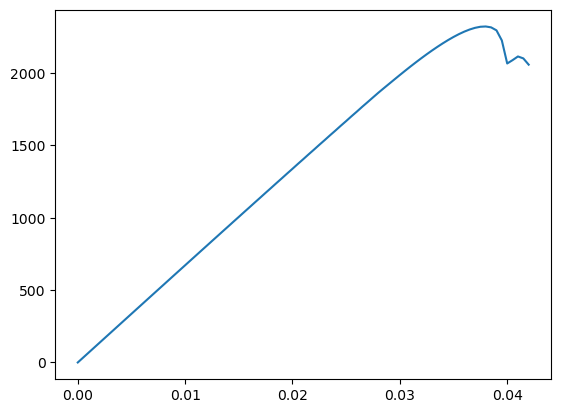

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe30147d520>

In [23]:
plot(Displacement,Load)

In [24]:
cd("../DispLoadASymThreePointBendingTest")

In [25]:
using DelimitedFiles
Disp = writedlm( "DispDataASymThreePointBendingTestCaseC.csv",  Displacement, ',')
Force = writedlm("LoadDataASymThreePointBendingTestCaseC.csv",  Load, ',')